<a href="https://colab.research.google.com/github/bholeneha/Text_Classification/blob/Fatima/NN_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings; warnings.simplefilter('ignore')

# New Section

In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import regex
#from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
names = []
base = 'sample_data/Data/'
with os.scandir(base) as entries:
    for entry in entries:
        if(entry.is_file() == False):
            names.append(entry.name)

try:
  names.remove(".ipynb_checkpoints")
except:
  pass
names

['Entertainment', 'Crime', 'Politics', 'Science']

In [3]:
files = {}
unique = []
for name in names:
    path = base + name+'/'
    x = []
    with os.scandir(path) as entries:
        for entry in entries:
            if(entry.is_file()):
                x.append(entry.name)
    files[name] = x
    files[name].sort()

In [4]:
for k, v in files.items():
    print(k, len(v))

Entertainment 130
Crime 130
Politics 130
Science 130


In [ ]:
data_LDA = {}
i = 0

for genre in files.keys() :
    texts = files[genre]
    for text in texts:
        if text in files[genre]:
            path = base + genre + '/' + text
            with open(path, "r", encoding = "latin1") as file:
                data_LDA[i] = file.readlines()
                i = i+1
            data_LDA[i-1] = [" ".join(data_LDA[i-1]), genre] 

data_LDA = pd.DataFrame(data_LDA).T
print(data_LDA.shape)
data_LDA.columns = ['Text', 'Class']
data_LDA.head()

(509, 2)


,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Entertainment
1,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
2,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Entertainment
4,\n Some sick part of me really liked that p...,Entertainment


In [ ]:
data_LDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    259 non-null    object
 1   Class   259 non-null    object
dtypes: object(2)
memory usage: 6.1+ KB


In [ ]:
unique = list(data_LDA.Text.unique())
len(unique)

259

In [ ]:
dic = dict(data_LDA)

In [ ]:
uni = {}
i = 0
for k in range(len(list(dic['Text']))):
    if dic['Text'][k] in unique:
        uni[i] = [dic['Text'][k], dic['Class'][k]]
        unique.remove(dic['Text'][k])
        i += 1

In [ ]:
data_LDA = pd.DataFrame(uni).T
print(data_LDA.shape)
data_LDA.columns = ['Text', 'Class']
data_LDA.head()

(259, 2)


,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Entertainment
1,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
2,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Entertainment
4,\n Some sick part of me really liked that p...,Entertainment


In [ ]:
data_LDA

,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Entertainment
1,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
2,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Entertainment
4,\n Some sick part of me really liked that p...,Entertainment
...,...,...
254,\n \n The idea of the card is bull in and of i...,Politics
255,\n richardp@spock.dis.cccd.edu (Richard Patter...,Politics
256,\n The San Francisco Examiner reports th...,Politics
257,\n In article <1993Apr16.171115.16812@synapse....,Politics


In [ ]:
def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [ ]:
data_LDA["filtered_text"] = data_LDA.Text.apply(lambda x : filter_text(x, stop)) 
data_LDA.head()

,Text,Class,filtered_text
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Entertainment,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Entertainment,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that p...,Entertainment,sick part really like phrase actually merely t...


In [ ]:
#list(set(data["filtered_text"][0].split(" ")))

#word_list = [text.split(" ") for text in data["filtered_text"]]

word_list = []
for text in data_LDA["filtered_text"]:
    temp = text.split(" ")
    word_list.append(temp)
    
    # for word in temp:
  #     if word not in word_list:
   #        word_list.append(word)
    
print(word_list)

[['archive', 'name', 'ripem', 'last', 'update', 'post', 'still', 'rather', 'rough', 'list', 'likely', 'question', 'information', 'ripem', 'program', 'public', 'mail', 'encryption', 'ripem', 'write', 'maintain', 'marc', 'vanheyningen', 'mvanheyn', 'whale', 'indiana', 'post', 'variety', 'newsgroups', 'monthly', 'basis', 'follow', 'discussion', 'specific', 'ripem', 'redirect', 'group', 'security', 'ripem', 'month', 'reformatted', 'post', 'attempt', 'comply', 'standards', 'hypertext', 'format', 'allow', 'easy', 'manipulation', 'document', 'world', 'wide', 'know', 'think', 'disclaimer', 'nothing', 'consider', 'legal', 'advice', 'anything', 'person', 'opinion', 'want', 'real', 'legal', 'advice', 'talk', 'real', 'lawyer', 'question', 'answer', 'ripem', 'ripem', 'program', 'perform', 'privacy', 'enhance', 'mail', 'use', 'cryptographic', 'techniques', 'allow', 'electronic', 'mail', 'properties', 'authentication', 'send', 'confirm', 'privacy', 'nobody', 'read', 'except', 'intend', 'recipient', '

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
type(word_list[0])

list

In [ ]:
# Create Dictionary 
id2word = corpora.Dictionary(word_list)

#print(id2word)

#dictionary = corpora.Dictionary([tokens])
#  print(dictionary)
    
# Create Corpus
texts = word_list

# Term Document Frequency
#corpus = id2word.doc2bow([word_list])
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 2), (10, 2), (11, 7), (12, 2), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 2), (32, 3), (33, 4), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 2), (48, 5), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 3), (59, 3), (60, 1), (61, 1), (62, 1), (63, 3), (64, 3), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 4), (79, 3), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 2), (93, 4), (94, 2), (95, 5), (96, 4), (97, 1), (98, 1), (99, 1), (100, 1), (101, 5), (102, 1), (103, 2), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (109, 2), (110, 1)

In [ ]:
###training LDA model

from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"would" + 0.007*"encryption" + 0.006*"privacy" + 0.005*"make" + '
  '0.005*"use" + 0.005*"write" + 0.005*"right" + 0.004*"post" + 0.004*"public" '
  '+ 0.004*"information"'),
 (1,
  '0.005*"post" + 0.005*"use" + 0.005*"public" + 0.004*"encryption" + '
  '0.004*"security" + 0.004*"information" + 0.004*"privacy" + 0.004*"internet" '
  '+ 0.004*"message" + 0.003*"ripem"'),
 (2,
  '0.005*"message" + 0.004*"encryption" + 0.004*"post" + 0.004*"public" + '
  '0.004*"would" + 0.004*"data" + 0.004*"use" + 0.004*"make" + '
  '0.003*"security" + 0.003*"privacy"'),
 (3,
  '0.006*"people" + 0.006*"use" + 0.005*"encryption" + 0.005*"post" + '
  '0.005*"write" + 0.004*"would" + 0.004*"make" + 0.004*"article" + '
  '0.003*"government" + 0.003*"time"')]


In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 5.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=4ee0dc96415ccbbd5c87df21f32fe74d5e6d5083ebb03ac12b578272009993a4
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
###Applying NNs to individual classes and for that first we create seperate data frames for each class
#import pandas as pd
#df = pd.read_csv('file_location\filename.txt', delimiter = "\t")

In [5]:
files = {}
unique = []
for name in names:
    path = base + name+'/'
    x = []
    with os.scandir(path) as entries:
        for entry in entries:
            if(entry.is_file()):
                x.append(entry.name)
    files[name] = x
    files[name].sort()

In [6]:
for k, v in files.items():
    print(k, len(v))

Entertainment 130
Crime 130
Politics 130
Science 130


In [7]:
data = {}
i = 0

for genre in files.keys() :
    texts = files[genre]
    for text in texts:
        if text in files[genre]:
            path = base + genre + '/' + text
            with open(path, "r", encoding = "latin1") as file:
                data[i] = file.readlines()
                i = i+1
            data[i-1] = [" ".join(data[i-1]), genre] 
#data
data = pd.DataFrame(data).T
print(data.shape)
data.columns = ['Text', 'Class']
data

(520, 2)


,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Entertainment
1,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
2,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Entertainment
4,\n Some sick part of me really liked that p...,Entertainment
...,...,...
515,\n In article <1qnmnp$db8@sol.TIS.COM> mjr@tis...,Science
516,Distribution: inet\n Message-ID: <1qoapv$9rn@l...,Science
517,NNTP-Posting-Host: sayshell.umd.edu\n \n In ar...,Science
518,\n In article <1993Apr16.165423.27204@linus.mi...,Science


In [8]:
data["Class"].unique()

array(['Entertainment', 'Crime', 'Politics', 'Science'], dtype=object)

In [ ]:
### Develop four seperate dataframes
#crime_df=data.loc[data['Class']=="Crime"]
#politics_df=data.loc[data['Class']=="Politics"]
#science_df=data.loc[data['Class']=="Science"]
#entertainment_df=data.loc[data['Class']=="Entertainment"]

In [10]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [11]:
data["filtered_text"] = data.Text.apply(lambda x : filter_text(x, stop)) 
data.head()

,Text,Class,filtered_text
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Entertainment,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Entertainment,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that p...,Entertainment,sick part really like phrase actually merely t...


In [12]:
#list(set(data["filtered_text"][0].split(" ")))

#word_list = [text.split(" ") for text in data["filtered_text"]]

word_list = []
for text in data["filtered_text"]:
    temp = text.split(" ")
    word_list.append(temp)
    
    # for word in temp:
  #     if word not in word_list:
   #        word_list.append(word)
    
print(word_list)

[['archive', 'name', 'ripem', 'last', 'update', 'post', 'still', 'rather', 'rough', 'list', 'likely', 'question', 'information', 'ripem', 'program', 'public', 'mail', 'encryption', 'ripem', 'write', 'maintain', 'marc', 'vanheyningen', 'mvanheyn', 'whale', 'indiana', 'post', 'variety', 'newsgroups', 'monthly', 'basis', 'follow', 'discussion', 'specific', 'ripem', 'redirect', 'group', 'security', 'ripem', 'month', 'reformatted', 'post', 'attempt', 'comply', 'standards', 'hypertext', 'format', 'allow', 'easy', 'manipulation', 'document', 'world', 'wide', 'know', 'think', 'disclaimer', 'nothing', 'consider', 'legal', 'advice', 'anything', 'person', 'opinion', 'want', 'real', 'legal', 'advice', 'talk', 'real', 'lawyer', 'question', 'answer', 'ripem', 'ripem', 'program', 'perform', 'privacy', 'enhance', 'mail', 'use', 'cryptographic', 'techniques', 'allow', 'electronic', 'mail', 'properties', 'authentication', 'send', 'confirm', 'privacy', 'nobody', 'read', 'except', 'intend', 'recipient', '

In [ ]:
###### USE ONLY WHEN CLEANING IS DONE BEFORE TRAIN AND TEST SPLIT

#import gensim
#from gensim.utils import simple_preprocess
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

#import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
###### USE ONLY WHEN CLEANING IS DONE BEFORE TRAIN AND TEST SPLIT


## Create Dictionary 
#id2word = corpora.Dictionary(word_list)


    
# # Create Corpus
#texts = word_list

# ###3Term Document Frequency

#corpus = [id2word.doc2bow(text) for text in texts]

#print(corpus)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 2), (10, 2), (11, 7), (12, 2), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 2), (32, 3), (33, 4), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 2), (48, 5), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 3), (59, 3), (60, 1), (61, 1), (62, 1), (63, 3), (64, 3), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 4), (79, 3), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 2), (93, 4), (94, 2), (95, 5), (96, 4), (97, 1), (98, 1), (99, 1), (100, 1), (101, 5), (102, 1), (103, 2), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (109, 2), (110, 1)

In [15]:
data["Class"].values

array(['Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', '

In [35]:


enc_df=pd.get_dummies(data,columns=["Class"])
#enc_df
labels=enc_df[["Class_Crime","Class_Politics","Class_Science","Class_Entertainment"]]
labels

,Class_Crime,Class_Politics,Class_Science,Class_Entertainment
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
515,0,0,1,0
516,0,0,1,0
517,0,0,1,0
518,0,0,1,0


In [58]:
####dividing into input and output
X=list(data["filtered_text"])
y=labels.values

In [59]:
###### DO WE REALLY HAVE TO DO IT AS they are doing bag of words after splitting into test and train

###divide our data into training and test sets:  
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [62]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('sample_data/Data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [63]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(4, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [64]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 200, 100)          789900    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 516       
Total params: 907,664
Trainable params: 117,764
Non-trainable params: 789,900
_________________________________________________________________
None


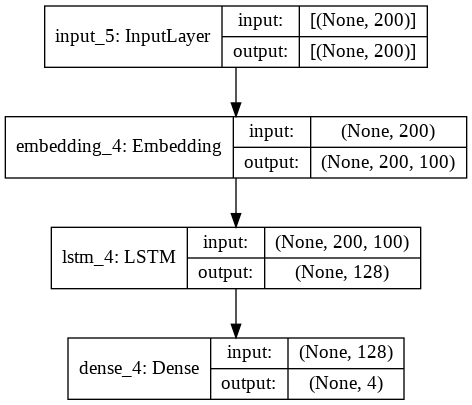

In [65]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [66]:
##### train our model for 5 epochs.
TrainedModel = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
3/3 [==============================] - 4s 857ms/step - loss: 0.6857 - acc: 0.2371 - val_loss: 0.6598 - val_acc: 0.2262
Epoch 2/10
3/3 [==============================] - 2s 618ms/step - loss: 0.6521 - acc: 0.3082 - val_loss: 0.6432 - val_acc: 0.1786
Epoch 3/10
3/3 [==============================] - 2s 607ms/step - loss: 0.6376 - acc: 0.2668 - val_loss: 0.6353 - val_acc: 0.1905
Epoch 4/10
3/3 [==============================] - 2s 598ms/step - loss: 0.6193 - acc: 0.2723 - val_loss: 0.5926 - val_acc: 0.2381
Epoch 5/10
3/3 [==============================] - 2s 610ms/step - loss: 0.5701 - acc: 0.2827 - val_loss: 0.5777 - val_acc: 0.2381
Epoch 6/10
3/3 [==============================] - 2s 614ms/step - loss: 0.5598 - acc: 0.2999 - val_loss: 0.5641 - val_acc: 0.3095
Epoch 7/10
3/3 [==============================] - 2s 614ms/step - loss: 0.5449 - acc: 0.3344 - val_loss: 0.5608 - val_acc: 0.2738
Epoch 8/10
3/3 [==============================] - 2s 615ms/step - loss: 0.5422 - acc: 0.29

In [67]:
### Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])


4/4 [==============================] - 0s 50ms/step - loss: 0.5543 - acc: 0.2692
Test Score: 0.5543242692947388
Test Accuracy: 0.26923078298568726
